In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from AdaBoost import AdaBoost

# Generating Example Data

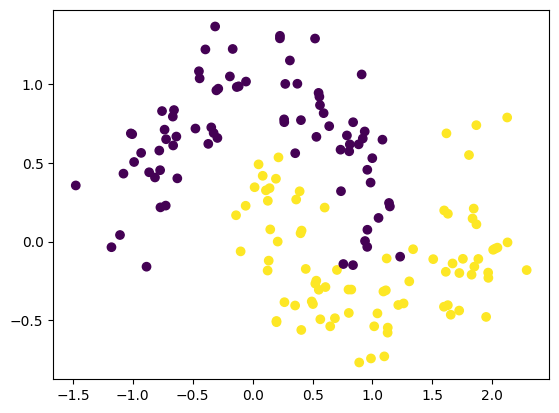

In [2]:
X, y = make_moons(200, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

# AdaBoost (with Perceptrons)

In [3]:
# Changing labels to 1 and -1
y_train[y_train==0] = -1
y_test[y_test==0] = -1

## Training

In [4]:
ab_clf = AdaBoost(X_train, y_train, random_state=42)
ab_clf.fit(rounds=500, wl_epochs=20, wl_lr=0.1)

## Evaluation

In [5]:
y_train_pred = ab_clf.predict(X_train)
y_test_pred = ab_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Train Set Accuracy: {train_acc:.2f}")
print(f"Test Set Accuracy: {test_acc:.2f}")

Train Set Accuracy: 1.00
Test Set Accuracy: 0.95


## Visualizing Predictions and Decision Boundaries

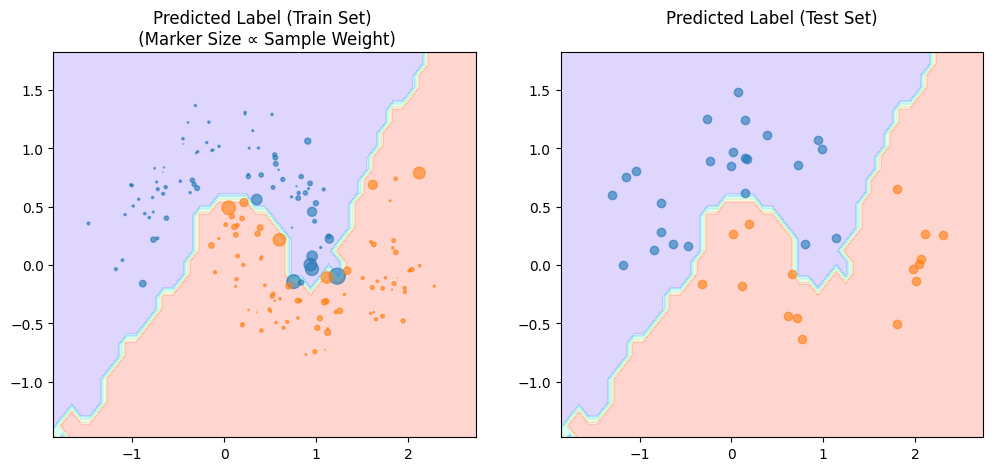

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# decision boundaries
x_min, x_max = X_train[0, :].min() - 2, X_train[0, :].max() + 2.5
y_min, y_max = X_train[1, :].min() - 0, X_train[1, :].max() + 1.5
h = 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = ab_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, cmap = 'rainbow', alpha=0.2)
ax[1].contourf(xx, yy, Z, cmap = 'rainbow', alpha=0.2)

# Train predictions
neg = (y_train_pred==-1)
pos = (y_train_pred==1)

ax[0].scatter(X_train[neg,0], X_train[neg,1], s=np.sum(ab_clf.w, axis=0)[neg] * 5e5, alpha=0.6)
ax[0].scatter(X_train[pos,0], X_train[pos,1], s=np.sum(ab_clf.w, axis=0)[pos] * 5e5, alpha=0.6)
ax[0].set_title(f"Predicted Label (Train Set) \n (Marker Size ∝ Sample Weight)")

# Test predictions
neg = (y_test_pred==-1)
pos = (y_test_pred==1)

ax[1].scatter(X_test[neg,0], X_test[neg,1], alpha=0.6)
ax[1].scatter(X_test[pos,0], X_test[pos,1], alpha=0.6)
ax[1].set_title(f"Predicted Label (Test Set)\n")

plt.show()

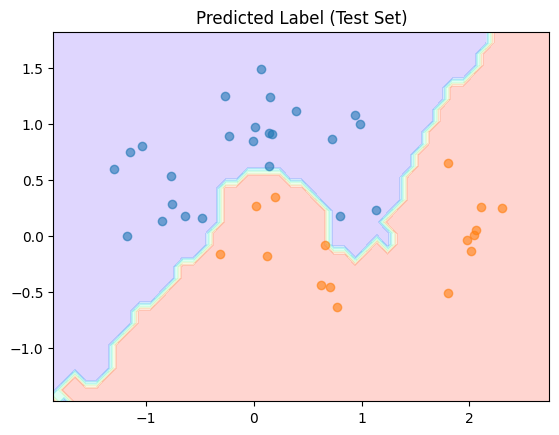

In [7]:
# decision boundaries
x_min, x_max = X_train[0, :].min() - 2, X_train[0, :].max() + 2.5
y_min, y_max = X_train[1, :].min() - 0, X_train[1, :].max() + 1.5
h = 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = ab_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = 'rainbow', alpha=0.2)

# predictions
neg = (y_test_pred==-1)
pos = (y_test_pred==1)

plt.scatter(X_test[neg,0], X_test[neg,1], alpha=0.6)
plt.scatter(X_test[pos,0], X_test[pos,1], alpha=0.6)
plt.title(f"Predicted Label (Test Set)")

plt.show()